Explore the Data The Fashion-MNIST train and test datasets are loaded, and their shapes are
printed. We can see that the training dataset contains 60,000 samples, whereas the test dataset
contains 10,000. We can also see that the images are square, measuring 28*28 pixels.

In [1]:
#Import necessary libraries to carry out this classification
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 4s 1us/step


In [3]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print("Number of images in training set {}".format(x_train.shape))
print("Number of labels in training set {}".format(y_train.shape))
print("Number of images in test set {}".format(x_test.shape))
print("Number of labels in test set {}".format(y_train.shape))

Number of images in training set (60000, 28, 28)
Number of labels in training set (60000,)
Number of images in test set (10000, 28, 28)
Number of labels in test set (60000,)


Thus we see that training dataset has 60000 images (rows) each of size (28,28) or 28x28 i.e. 2-D
images, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255
for black.
Since a convolutional layer takes a 2-D image (2-D array) as input, we needn’t convert these 2-D
images to a 1-D arrays

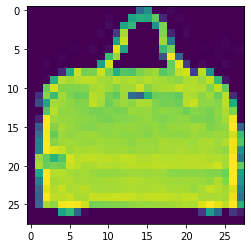

In [5]:
plt.figure()
plt.imshow(np.squeeze(x_train[220]))

In [6]:
y_train[220]

8

So, we see that image at index (instance no.) 220 is a bag, and the corresponding label value also
indicates the same (8 - Bag).

#Data visualization Now we will see some of the sample images from the fashion MNIST dataset.
For this, we will use the library matplotlib to show our np array data in the form of plots of images.

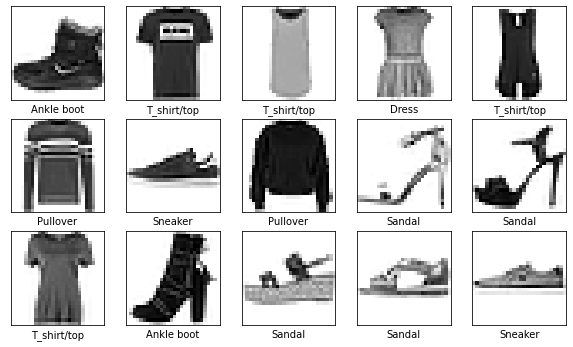

In [7]:
# Let us plot some training images to see how they look
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Preprocess the Data Each image in the collection has unsigned integer pixel values that fall
between 0 and 255 or black and white. Although we are still determining the ideal modeling scaling
strategy, we know some scaling will be needed.

### Normalize the image pixel values. The pixel values for the images lie between 0 to 255 now, which is a large range.Let us normalize these values to a range from 0 to 1. To do this, we can simply divide each pixel value with 255

In [8]:
x_train=x_train/255
x_test=x_test/255

### 0.1 Build Model

Let’s move on and construct a straightforward neural network model to predict our apparel categories.

Another widely used deep learning package is Keras. At Google, François Chollet created it. It is
known for its quick prototyping and ease of model construction. However, it is a high-level library,
so it doesn’t carry out low-level tasks like convolution. To accomplish that, it makes use of a
backend engine like TensorFlow. TensorFlow 2.0 uses the Keras API, available in tf.keras, as its
main API.

### 0.1.1 Four critical processes are involved in model construction in Keras :
### Defining the model
### Compiling the model

### Fitting the model
### Evaluating the model
### 0.1.2 Defining the Model:

Keras provides two APIs for defining the model

The Sequential API

The Functional API

In the top layer of this network, The format of the photos was changed from a two-dimensional
array (28 by 28 pixels) to a one-dimensional array (28 * 28 = 784 pixels) when layers flattened
them. This layer restructures the fashion MNIST data. There are no parameters to learn. Consider
this layer lining up and unstacking rows of pixels in the image. A series of two tf.keras.layers make
up the network when the pixels are flattened.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

### Dense layers: 
These neuronal layers are fully or densely linked. There are 128 nodes in the
dense top layer (or neurons). A 10-element logits array is returned by the second (and final) layer.
Each node has a score that indicates which of the ten classes the current image belongs to.
Let’s begin by defining our model as a Sequential() model, as seen below :

In [10]:
# We will create a straightforward CNN architecture with three convolutional layers followed by
# three max-pooling layers for this dataset. Convolutional layers will perform the convolutional
# operation and extract the features, while the max-pooling layer will downsample the features.
cnn_model = Sequential()

In [11]:
# We are learning 64 filters with a kernel size of 3x3
# First convolutional layer. Number of neurons = 32 filter(kernel) size = 3x3 Activation function = Relu
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))

In [12]:
# Max Pool Layer: It will reduce the size with a kernel size of 2x2
# Since input to CNN is a 2-D image and ouput from last convolutional layer (featuerMap) is also 2-D array
# we will use 2D version of Max Pooling function of TensorFlow Keras to create a Max Pooling Layer
cnn_model.add(MaxPooling2D(pool_size= (2,2)))

In [13]:
# Fully Connected (FC) Layer: Once the convolutional and pooling operations are done the layer is flattened and
# fully connected layers are added hence, we need to convert 2-D output (2-D array) of last convolutional layer
# (conv3) to 1-D array i.e. we need to flatten the 2-D array to 1-D array
cnn_model.add(Flatten())

In [14]:
# Fully Connected (FC) Layer - Hidden(Dense) Layer
# Normally, the number of neurons that we keep in FC layer should be equal to the number of neurons in just
# immediate previous convolutional layer
cnn_model.add(Dense(32,activation = 'relu'))

In [15]:
# Output Layer - with 10 neurons (as we have 10 output classes) and using 'sigmoid' function
cnn_model.add(Dense(10,activation = 'sigmoid'))

In [16]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 17,066
Trainable params: 17,066
Non-trainable params: 0
____________________________________________________

### Compile the Model 
The model’s compilation comes next after it has been defined. In this stage,
we configure the model’s learning process. When building the model, we specify three parameters :
### The optimizer’s setting: 
This specifies the optimization algorithm we want to employ, in this
instance, the stochastic gradient descent. We can also use Adam optimizers in most CNN architectures because it is very efficient on larger problems and helps us achieve correct weights and
learning rates with minimum loss.
### The loss factor is: 
In each of the ten classes, this objective function—such as the mean squared
error for regression or cross-entropy loss for classification is what we are attempting to reduce.
The model’s performance would be evaluated using the metrics parameter. An example of a metric
would be accuracy.

In [17]:
##Once the model architecture is defined, we will compile and build the model.
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])

### Train the Model 
Above, we created the model as well as built it. We’ll start training the model
now. The model can use the fit function to train the model. The following is used to specify our
features, labels, the number of training epochs we desire, and the batch size :

In [18]:
# history=cnn_model.fit(x_train, y_train, batch_size=32, epochs=10)
history=cnn_model.fit(x_train,y_train,batch_size =512,epochs = 5,verbose = 1,validation_data = (x_test,y_test) )

Epoch 1/5
118/118 [==============================] - 2s 15ms/step - loss: 1.2641 - accuracy: 0.6015 - val_loss: 0.7560 - val_accuracy: 0.7263
Epoch 2/5
118/118 [==============================] - 2s 20ms/step - loss: 0.6616 - accuracy: 0.7604 - val_loss: 0.6191 - val_accuracy: 0.7769
Epoch 3/5
118/118 [==============================] - 2s 17ms/step - loss: 0.5682 - accuracy: 0.7953 - val_loss: 0.5600 - val_accuracy: 0.7979
Epoch 4/5
118/118 [==============================] - 1s 12ms/step - loss: 0.5206 - accuracy: 0.8134 - val_loss: 0.5226 - val_accuracy: 0.8093
Epoch 5/5
118/118 [==============================] - 3s 25ms/step - loss: 0.4918 - accuracy: 0.8232 - val_loss: 0.5049 - val_accuracy: 0.8170


In [19]:
cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.8170


[0.5049419403076172, 0.8169999718666077]

### Make Predictions 
You can utilize the model after it has been trained to generate predictions
about some images. With the softmax function, we can transform the model’s linear outputs—
logits—into probabilities, which should be simpler to understand.

In [20]:
probability_model = tf.keras.Sequential([cnn_model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


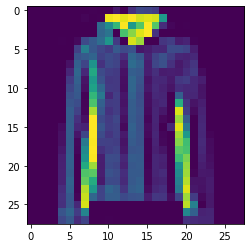

In [21]:
img = x_test[6]
plt.imshow(img)

### Verify Predictions 
In this instance, the model predicted each label for an image in the testing
set. Let’s match the prediction index to the class name with a class_names array. Look at the
prediction first :

In [22]:
y_predict = class_names[np.argmax(predictions[6])]
y_predict

'Coat'

### The model is the most certain that this image represents a class name [9] ankle boot. The test label examination reveals that this categorization is accurate :

In [23]:
y_actual = class_names[y_test[6]]
y_actual

'Coat'

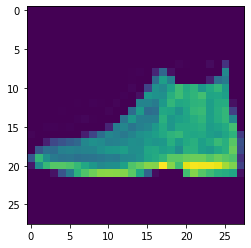

In [24]:
img = x_test[0]
plt.imshow(img)

In [25]:
y_predict = class_names[np.argmax(predictions[0])]
y_predict

'Ankle boot'

In [26]:
y_actual = class_names[y_test[0]]
y_actual

'Ankle boot'

In [27]:
# we are using the normalized input data
test_loss, test_accuracy = cnn_model.evaluate(x_train, y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4779 - accuracy: 0.8288


In [28]:
print(test_accuracy)

0.8287833333015442


In [29]:
print(test_loss)

0.4778580367565155


In [30]:
history.history??

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

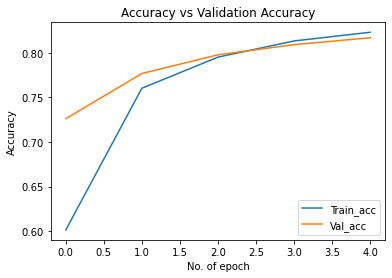

In [32]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs Validation Accuracy")
plt.xlabel("No. of epoch")
plt.ylabel("Accuracy")
plt.legend(['Train_acc', 'Val_acc'], loc='lower right')
plt.show()

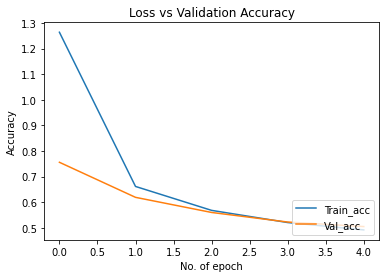

In [34]:
plt.plot(history.history['loss'],label='Accuracy')
plt.plot(history.history['val_loss'])
plt.title("Loss vs Validation Accuracy")
plt.xlabel("No. of epoch")
plt.ylabel("Accuracy")
plt.legend(['Train_acc', 'Val_acc'], loc='lower right')
plt.show()